In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

In [2]:
# 企业信息
df1 = pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx', sheetname = 0) 
df1['企业代号'] = df1['企业代号'].apply(lambda x: int(x[1:]))
df1.head()

,企业代号,企业名称,信誉评级,是否违约
0,1,***电器销售有限公司,A,否
1,2,***技术有限责任公司,A,否
2,3,***电子(中国)有限公司***分公司,C,否
3,4,***发展有限责任公司,C,否
4,5,***供应链管理有限公司,B,否


In [3]:
# 进项发票信息
df2 = pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx', sheetname = 1)
df2['企业代号'] = df2['企业代号'].apply(lambda x: int(x[1:]))
df2.head()

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票


In [4]:
# 销项发票信息
df3 = pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx', sheetname = 2)
df3['企业代号'] = df3['企业代号'].apply(lambda x: int(x[1:]))
df3.head()

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票


In [5]:
df_default = df1.groupby(['信誉评级','是否违约']).count()
df_default = df_default.reset_index()
df_default

,信誉评级,是否违约,企业代号,企业名称
0,A,否,27,27
1,B,否,37,37
2,B,是,1,1
3,C,否,32,32
4,C,是,2,2
5,D,是,24,24


In [6]:
# ABCD四类评级的违约率
da = 0
db = list(df_default[(df_default['信誉评级'] == 'B') & (df_default['是否违约'] == '是')]['企业代号'])[0]/ \
list(df_default[df_default['信誉评级'] == 'B']['企业代号'])[0]
dc = list(df_default[(df_default['信誉评级'] == 'C') & (df_default['是否违约'] == '是')]['企业代号'])[0]/ \
list(df_default[df_default['信誉评级'] == 'C']['企业代号'])[0]
dd = list(df_default[(df_default['信誉评级'] == 'D') & (df_default['是否违约'] == '是')]['企业代号'])[0]/ \
list(df_default[df_default['信誉评级'] == 'D']['企业代号'])[0]
default_rate = [da, db, dc, dd] 
default_rate

[0, 0.02702702702702703, 0.0625, 1.0]

In [7]:
df2_valid = df2.groupby(['企业代号','发票状态'])['发票号码'].count()
df2_valid_reset = df2_valid.reset_index()

In [8]:
valid_rate_list = []
for i in range(1, 124):
    valid_rate_list.append(list(df2_valid_reset[(df2_valid_reset['企业代号'] == i) 
                                                & (df2_valid_reset['发票状态'] == '有效发票')]['发票号码'])[0] /\
    sum(list(df2_valid_reset[df2_valid_reset['企业代号'] == i]['发票号码'])))
df1['发票有效率'] = valid_rate_list
df1.head()

,企业代号,企业名称,信誉评级,是否违约,发票有效率
0,1,***电器销售有限公司,A,否,0.944202
1,2,***技术有限责任公司,A,否,0.977578
2,3,***电子(中国)有限公司***分公司,C,否,0.957465
3,4,***发展有限责任公司,C,否,0.933692
4,5,***供应链管理有限公司,B,否,0.960811


In [9]:
df1.groupby('信誉评级')[['发票有效率']].describe()

发票有效率                                                                 
     count      mean       std       min       25%       50%       75%  max
信誉评级                                                                       
A     27.0  0.971217  0.018695  0.943842  0.956074  0.971564  0.981032  1.0
B     38.0  0.964824  0.033334  0.871795  0.948918  0.974374  0.986926  1.0
C     34.0  0.975376  0.023047  0.913730  0.961910  0.979029  0.994667  1.0
D     24.0  0.980382  0.024963  0.907895  0.969755  0.988537  1.000000  1.0

In [10]:
# 删除作废发票数据
df2 = df2[df2['发票状态'] == '有效发票']

df2_invoice_num = df2.groupby(['企业代号'])['发票号码'].count()
df2_invoice_num = df2_invoice_num.reset_index()
df2_invoice_num.columns = ['企业代号', '有效发票数']

In [11]:
# 删除作废发票数据
df3 = df3[df3['发票状态'] == '有效发票']

df3_invoice_num = df3.groupby(['企业代号'])['发票号码'].count()
df3_invoice_num = df3_invoice_num.reset_index()
df3_invoice_num.columns = ['企业代号', '有效发票数']

In [12]:
df1['有效发票数'] = df2_invoice_num['有效发票数'] + df3_invoice_num['有效发票数']
df1.head()

,企业代号,企业名称,信誉评级,是否违约,发票有效率,有效发票数
0,1,***电器销售有限公司,A,否,0.944202,11135
1,2,***技术有限责任公司,A,否,0.977578,43100
2,3,***电子(中国)有限公司***分公司,C,否,0.957465,28055
3,4,***发展有限责任公司,C,否,0.933692,2562
4,5,***供应链管理有限公司,B,否,0.960811,3089


In [13]:
# 计算供应商数量
df_up = df2.groupby('企业代号')['销方单位代号'].unique()
df_up = df_up.apply(lambda x: len(x))
df_up = df_up.to_frame()
df_up.columns = ['供应商数量']

In [14]:
# 计算客户数量
df_down = df3.groupby('企业代号')['购方单位代号'].unique()
df_down = df_down.apply(lambda x: len(x))
df_down = df_down.to_frame()
df_down.columns = ['客户数量']

In [15]:
df1['供应商数量'] = df_up['供应商数量'].tolist()
df1['客户数量'] = df_down['客户数量'].tolist()
df1.head()

,企业代号,企业名称,信誉评级,是否违约,发票有效率,有效发票数,供应商数量,客户数量
0,1,***电器销售有限公司,A,否,0.944202,11135,436,352
1,2,***技术有限责任公司,A,否,0.977578,43100,3625,1579
2,3,***电子(中国)有限公司***分公司,C,否,0.957465,28055,571,135
3,4,***发展有限责任公司,C,否,0.933692,2562,131,26
4,5,***供应链管理有限公司,B,否,0.960811,3089,393,33


In [16]:
# 计算现金流总量
df2_amount = df2.groupby('企业代号')[['价税合计']].sum()
df3_amount = df3.groupby('企业代号')[['价税合计']].sum()
df1['现金流总量'] = list((df2_amount + df3_amount)['价税合计'])

In [17]:
df1 = df1.drop(columns=['发票有效率'])
df1.head()

,企业代号,企业名称,信誉评级,是否违约,有效发票数,供应商数量,客户数量,现金流总量
0,1,***电器销售有限公司,A,否,11135,436,352,1.133658e+10
1,2,***技术有限责任公司,A,否,43100,3625,1579,7.887836e+08
2,3,***电子(中国)有限公司***分公司,C,否,28055,571,135,7.152496e+08
3,4,***发展有限责任公司,C,否,2562,131,26,2.401125e+09
4,5,***供应链管理有限公司,B,否,3089,393,33,4.606227e+08


In [18]:
df1['是否违约'] = df1['是否违约'].apply(lambda x: 1 if x == '是' else 0)
df1.head()

,企业代号,企业名称,信誉评级,是否违约,有效发票数,供应商数量,客户数量,现金流总量
0,1,***电器销售有限公司,A,0,11135,436,352,1.133658e+10
1,2,***技术有限责任公司,A,0,43100,3625,1579,7.887836e+08
2,3,***电子(中国)有限公司***分公司,C,0,28055,571,135,7.152496e+08
3,4,***发展有限责任公司,C,0,2562,131,26,2.401125e+09
4,5,***供应链管理有限公司,B,0,3089,393,33,4.606227e+08


In [19]:
df1.columns = ['id','name','rating','default','InvoiceNum','SupplierNum','CustomerNum','TotalCash']
df1.head()

,id,name,rating,default,InvoiceNum,SupplierNum,CustomerNum,TotalCash
0,1,***电器销售有限公司,A,0,11135,436,352,1.133658e+10
1,2,***技术有限责任公司,A,0,43100,3625,1579,7.887836e+08
2,3,***电子(中国)有限公司***分公司,C,0,28055,571,135,7.152496e+08
3,4,***发展有限责任公司,C,0,2562,131,26,2.401125e+09
4,5,***供应链管理有限公司,B,0,3089,393,33,4.606227e+08


In [20]:
import math

df1['lgInvoiceNum'] = [math.log(s) for s in df1['InvoiceNum']]
df1['lgSupplierNum'] = [math.log(s) for s in df1['SupplierNum']]
df1['lgCustomerNum'] = [math.log(s) for s in df1['CustomerNum']]
df1['lgTotalCash'] = [math.log(s) for s in df1['TotalCash']]

In [21]:
%matplotlib inline
import os
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.max_rows', None) # 显示所有行

In [22]:
train = df1.sample(frac = 0.7, random_state=1234).copy()
test = df1[~ df1.index.isin(train.index)].copy()
print('训练集样本量: %i \n 测试集样本量： %i' %(len(train), len(test)))

训练集样本量: 86 
 测试集样本量： 37


In [23]:
lg_m1 = smf.glm(formula = 'default ~ lgSupplierNum  + lgCustomerNum + lgInvoiceNum + lgTotalCash', data = train, 
               family = sm.families.Binomial(sm.families.links.logit)).fit()
lg_m1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,14.8314,4.049,3.663,0.000,6.895,22.767
lgSupplierNum,0.7396,0.423,1.748,0.080,-0.089,1.569
lgCustomerNum,-0.6299,0.343,-1.835,0.066,-1.303,0.043
lgInvoiceNum,-0.1048,0.662,-0.158,0.874,-1.402,1.192
lgTotalCash,-1.0244,0.386,-2.651,0.008,-1.782,-0.267


In [24]:
# 向前逐步回归法
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = smf.glm(
                formula=formula, data=data, 
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = smf.glm(
        formula=formula, data=data, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [25]:
candidates = ['default', 'lgSupplierNum', 'lgCustomerNum', 'lgInvoiceNum', 'lgTotalCash']
data_for_select = train[candidates]

lg_m2 = forward_select(data=data_for_select, response = 'default')
lg_m2.summary()

aic is 72.82829059811323,continuing!
aic is 68.32720145733225,continuing!
aic is 65.22445347592034,continuing!
forward selection over!
final formula is default ~ lgTotalCash + lgCustomerNum + lgSupplierNum 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                   86
Model:                            GLM   Df Residuals:                       82
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28.612
Date:                Sun, 13 Sep 2020   Deviance:                       57.224
Time:                        17:28:44   Pearson chi2:                     96.5
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.0535      3.816      3.945      0.000       7.575      22.532
lgTotalCash      -1.0643      0.296     -3.600      0.000      -1.644      -0.485
lgCustomerNum    -0.6596      0.289     -2.280      0.023      -1.227      -0.093
lgSupplierNum     0.7033      0.349      2.015      0.044       0.019       1.387
=================================================================================
"""

In [26]:
# 计算方差膨胀因子VIF
def vif(df, col_i):
    from statsmodels.formula.api import ols
    
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [27]:
exog = df1[['lgSupplierNum', 'lgCustomerNum', 'lgTotalCash']]

for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

lgSupplierNum 	 2.7160156790686094
lgCustomerNum 	 1.2665606154505238
lgTotalCash 	 2.563246069651752


In [28]:
df1.head()

,id,name,rating,default,InvoiceNum,SupplierNum,CustomerNum,TotalCash,lgInvoiceNum,lgSupplierNum,lgCustomerNum,lgTotalCash
0,1,***电器销售有限公司,A,0,11135,436,352,1.133658e+10,9.317849,6.077642,5.863631,23.151300
1,2,***技术有限责任公司,A,0,43100,3625,1579,7.887836e+08,10.671278,8.195610,7.364547,20.486003
2,3,***电子(中国)有限公司***分公司,C,0,28055,571,135,7.152496e+08,10.241922,6.347389,4.905275,20.388142
3,4,***发展有限责任公司,C,0,2562,131,26,2.401125e+09,7.848543,4.875197,3.258097,21.599203
4,5,***供应链管理有限公司,B,0,3089,393,33,4.606227e+08,8.035603,5.973810,3.496508,19.948090


In [29]:
df1 = df1.drop(['InvoiceNum', 'SupplierNum', 'CustomerNum', 'TotalCash', 'lgInvoiceNum'], axis=1)
df1.columns = ['id', 'name', 'rating', 'default', 'lgX1', 'lgX2', 'lgX3']
df1.head()

,id,name,rating,default,lgX1,lgX2,lgX3
0,1,***电器销售有限公司,A,0,6.077642,5.863631,23.151300
1,2,***技术有限责任公司,A,0,8.195610,7.364547,20.486003
2,3,***电子(中国)有限公司***分公司,C,0,6.347389,4.905275,20.388142
3,4,***发展有限责任公司,C,0,4.875197,3.258097,21.599203
4,5,***供应链管理有限公司,B,0,5.973810,3.496508,19.948090


In [30]:
train['pi'] = lg_m2.predict(train)
test['pi'] = lg_m2.predict(test)

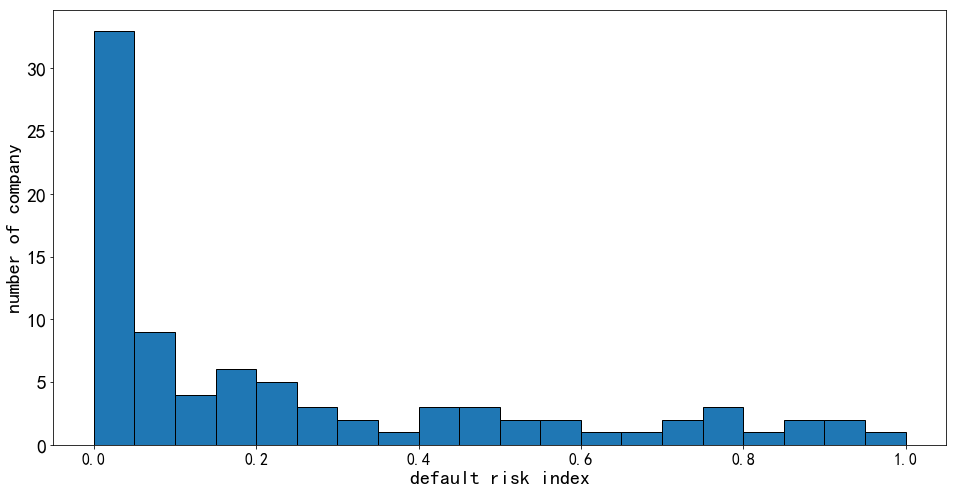

In [31]:
plt.figure(figsize = (16, 8))
plt.hist(list(train['pi']), bins = 20, range = [0,1], edgecolor = 'black')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('default risk index', fontsize = 20)
plt.ylabel('number of company', fontsize = 20)
plt.savefig('distribution_of_pi_1.jpg')
plt.show()

In [32]:
train.groupby('rating')[['pi']].describe()

pi                                                              \
       count      mean       std       min       25%       50%       75%   
rating                                                                     
A       16.0  0.043428  0.063280  0.001368  0.007044  0.015245  0.033688   
B       27.0  0.138938  0.156244  0.005551  0.028290  0.062661  0.216752   
C       25.0  0.191340  0.189573  0.003787  0.049057  0.113355  0.292435   
D       18.0  0.653907  0.275943  0.035629  0.560787  0.747419  0.868471   

                  
             max  
rating            
A       0.181715  
B       0.502044  
C       0.704094  
D       0.958789

In [33]:
train['pi'].describe()

count    86.000000
mean      0.244186
std       0.284650
min       0.001368
25%       0.026119
50%       0.111711
75%       0.404348
max       0.958789
Name: pi, dtype: float64

In [34]:
train['pi'].skew()

1.1701971406510554

In [35]:
train['pi'].kurt()

0.13120662289995577

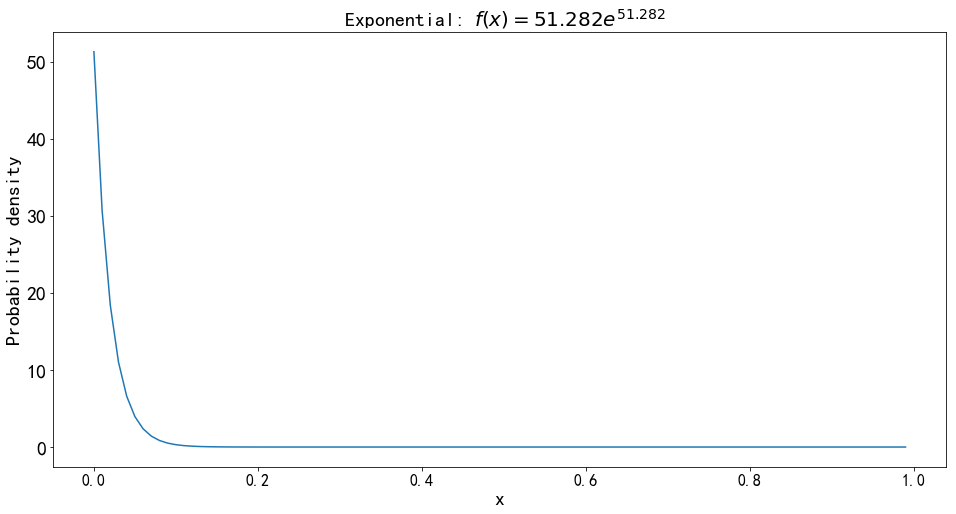

In [36]:
plt.figure(figsize = (16, 8))
lambd = 51.282
x = np.arange(0, 1, 0.01)
y = lambd * np.exp(-lambd *x) # could also use stats.expon.pdf
plt.plot(x,y) 
plt.title(' Exponential: $f(x) = 51.282 e^{51.282}$', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('Probability density', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.savefig('exponential_pdf.jpg')
plt.show()

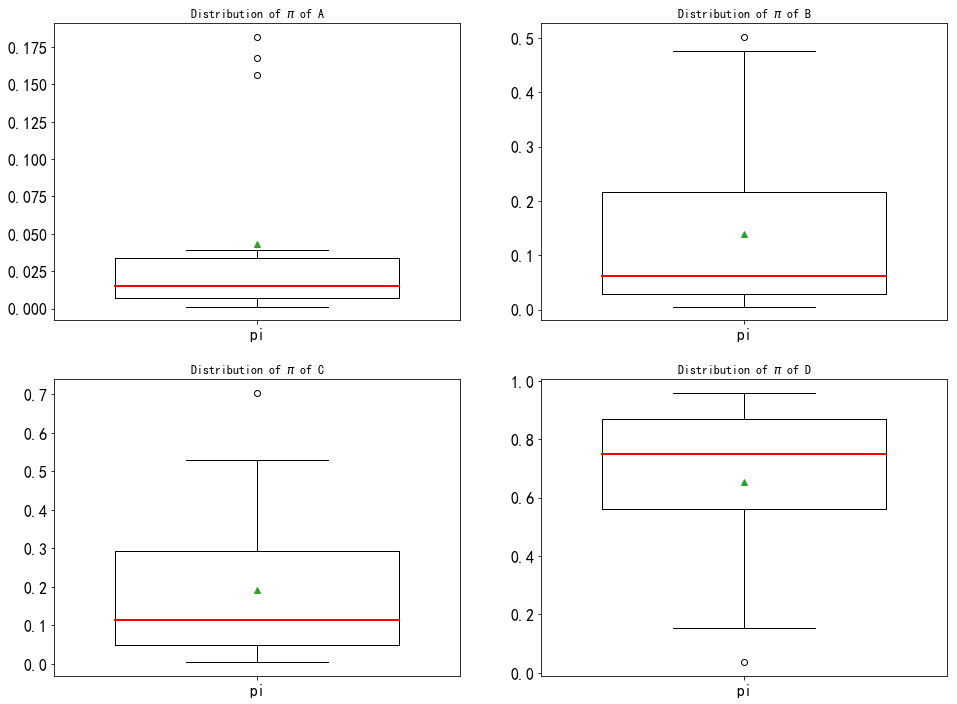

In [37]:
plt.figure(figsize = (16,12))
plt.subplot(2,2,1)
plt.boxplot(list(train[train['rating'] == 'A']['pi']), widths = 0.7, labels = ['pi'],
            showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of $\pi$ of A', fontsize = 12)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.subplot(2,2,2)
plt.boxplot(list(train[train['rating'] == 'B']['pi']), widths = 0.7, labels = ['pi'],
            showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of $\pi$ of B', fontsize = 12)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.subplot(2,2,3)
plt.boxplot(list(train[train['rating'] == 'C']['pi']), widths = 0.7, labels = ['pi'],
            showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of $\pi$ of C', fontsize = 12)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.subplot(2,2,4)
plt.boxplot(list(train[train['rating'] == 'D']['pi']), widths = 0.7, labels = ['pi'],
            showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of $\pi$ of D', fontsize = 12)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig('boxplot_of_pi.jpg')
plt.show()

In [38]:
train['quantile'] = train['pi'].rank() / len(train['pi'])
test['quantile'] = test['pi'].rank() / len(test['pi'])

In [39]:
df5 = pd.concat([train, test], axis = 0).sort_values(by="id", ascending=True)
df5 = df5.drop(['InvoiceNum', 'SupplierNum', 'CustomerNum', 'TotalCash', 'lgInvoiceNum'], axis=1)
df5.columns = ['id', 'name', 'rating', 'default', 'lgX1', 'lgX2', 'lgX3','pi','quantile']
df5.head()

,id,name,rating,default,lgX1,lgX2,lgX3,pi,quantile
0,1,***电器销售有限公司,A,0,6.077642,5.863631,23.151300,0.000103,0.027027
1,2,***技术有限责任公司,A,0,8.195610,7.364547,20.486003,0.002889,0.046512
2,3,***电子(中国)有限公司***分公司,C,0,6.347389,4.905275,20.388142,0.004418,0.108108
3,4,***发展有限责任公司,C,0,4.875197,3.258097,21.599203,0.001285,0.054054
4,5,***供应链管理有限公司,B,0,5.973810,3.496508,19.948090,0.013615,0.186047


In [40]:
df5.to_excel('data1_quantile.xlsx')

在R中计算risk

In [41]:
data1 = pd.read_excel('data1_risk.xlsx', sheetname = 0)
data1.head()

,id,name,rating,default,lgX1,lgX2,lgX3,pi,quantile,risk
0,1,***电器销售有限公司,A,0,6.077642,5.863631,23.151300,0.000116,0.027027,0.000534
1,2,***技术有限责任公司,A,0,8.195610,7.364547,20.486003,0.002874,0.046512,0.000929
2,3,***电子(中国)有限公司***分公司,C,0,6.347389,4.905275,20.388142,0.003982,0.108108,0.002231
3,4,***发展有限责任公司,C,0,4.875197,3.258097,21.599203,0.001410,0.081081,0.001649
4,5,***供应链管理有限公司,B,0,5.973810,3.496508,19.948090,0.014360,0.186047,0.004014


In [42]:
df_default_rate = pd.read_excel('附件3：银行贷款年利率与客户流失率关系的统计数据.xlsx', sheetname = 0)
df_default_rate.columns = ['贷款年利率','评级A的客户流失率','评级B的客户流失率','评级C的客户流失率']
df_default_rate = df_default_rate.drop([0]).reset_index().drop(columns=['index'])

In [43]:
# 计算每个企业的贷款年利率
W = 0.0175
result = np.zeros((len(df1), len(df_default_rate)))
R = [0 for i in range(len(df1))]

for i in range(len(df1)):
    for j in range(len(df_default_rate)):
        if df1['rating'][i] == 'A':        
            result[i,j] = (df_default_rate['贷款年利率'][j] - W - data1['risk'][i])*(1-df_default_rate['评级A的客户流失率'][j])
            R[i] = df_default_rate['贷款年利率'][np.argmax(np.array(list(result[i,:])))]
        elif df1['rating'][i] == 'B':
            result[i,j] = (df_default_rate['贷款年利率'][j] - W - data1['risk'][i])*(1-df_default_rate['评级B的客户流失率'][j])
            R[i] = df_default_rate['贷款年利率'][np.argmax(np.array(list(result[i,:])))]
        elif df1['rating'][i] == 'C':
            result[i,j] = (df_default_rate['贷款年利率'][j] - W - data1['risk'][i])*(1-df_default_rate['评级C的客户流失率'][j])
            R[i] = df_default_rate['贷款年利率'][np.argmax(np.array(list(result[i,:])))]
        else:
            result[i, :] = 0

data1['R'] = R

In [44]:
data1.groupby(['rating','R'])[['R']].count()

R
rating R         
A      0.0745  27
B      0.0825  23
       0.0945   8
       0.1065   6
       0.1185   1
C      0.0825  11
       0.0905  15
       0.1105   8
D      0.0000  24

In [45]:
data1.to_excel('data1_rate.xlsx')